# Homework 2: U.S. Boundary Currents

Name: Tara Parker

Date: 03/09/2024

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [1]:
# import modules here
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [2]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_EVEL = xr.open_dataset('EVEL_2015_12.nc')
ds_NVEL = xr.open_dataset('NVEL_2015_12.nc')
ds_NVEL

<xarray.Dataset>
Dimensions:    (i: 720, k: 50, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 0 1 2 3 4 5 6 7 8 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j          (j) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 2015-12-16T12:00:00
    latitude   (j) float64 ...
    longitude  (i) float64 ...
    Z          (k) float32 ...
    timestep   (time) int64 ...
    time_bnds  (time, nv) datetime64[ns] ...
Dimensions without coordinates: nv
Data variables:
    NVEL       (time, k, j, i) float64 ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Tue Aug 27 17:34:26 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

In [3]:
# store the velocity components and longitude/latitude data
# into numpy arrays
EVEL = ds_EVEL['EVEL'].values
NVEL = ds_NVEL['NVEL'].values
lon = ds_EVEL['longitude'].values
lat = ds_EVEL['latitude'].values

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

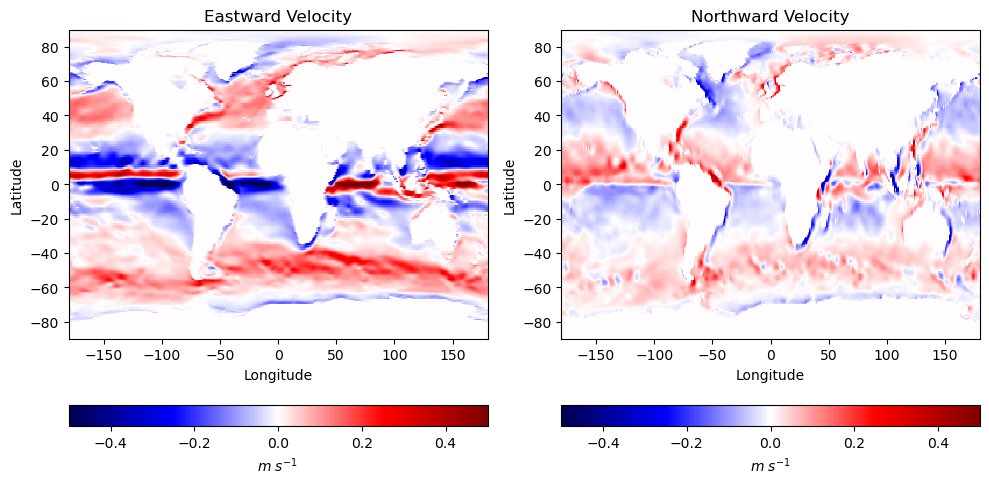

In [4]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,EVEL[0, 0, :, :], vmin = -0.5, vmax=0.5, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$m$ $s^{-1}$' ) 
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,NVEL[0, 0, :, :], vmin = -0.5, vmax=0.5, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$m$ $s^{-1}$' ) 
plt.title('Northward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.tight_layout()
plt.show()

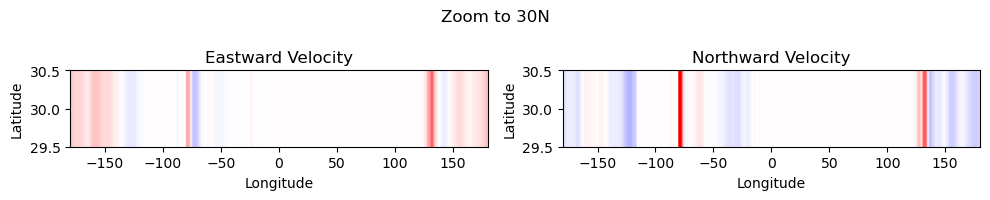

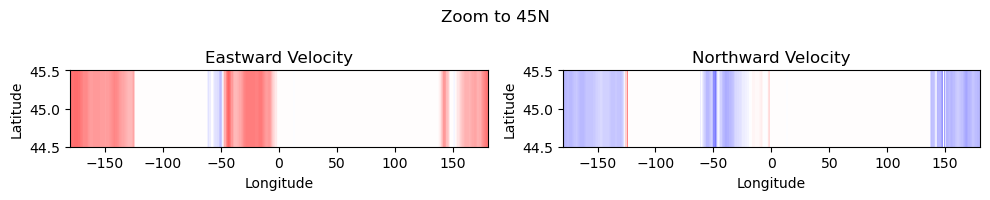

In [5]:
#~~~~~~ Just some zoomed plots for 30N and 45N ~~~~~~~

# make a figure
fig = plt.figure(figsize=(10,2))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,EVEL[0, 0, :, :], vmin = -0.5, vmax=0.5, cmap='seismic')
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.ylim(29.5, 30.5)

# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,NVEL[0, 0, :, :], vmin = -0.5, vmax=0.5, cmap='seismic')
plt.title('Northward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.ylim(29.5, 30.5)

plt.suptitle('Zoom to 30N')
plt.tight_layout()
plt.show()



# make a figure
fig = plt.figure(figsize=(10,2))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,EVEL[0, 0, :, :], vmin = -0.5, vmax=0.5, cmap='seismic')
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.ylim(44.5, 45.5)

# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,NVEL[0, 0, :, :], vmin = -0.5, vmax=0.5, cmap='seismic')
plt.title('Northward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.ylim(44.5, 45.5)

plt.suptitle('Zoom to 45N')
plt.tight_layout()
plt.show()

### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30N on the east cost of the U.S.? the west coast?
    - 45N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

### Answers:
In general, I expected these waters to move in a clockwise direction in the oceans to the east of the US and also to the west of the US, with the clock pattern generally centered near-ish the 30N line. 

1. What direction are the surface currents moving (roughly) at:
    - 30N on the east cost of the U.S.? 
    To the east coast, we have roughly a northeast current (NNE?). (Note that the zoomed plot shows a very faint, thin line of westarly velocity to the east of the US at the 30N mark (maybe the gulf of Mexico?), but in the larger map, the direction is generally easterly. )
    
    - 30N the west coast?
    On the west coast we have a southwest current on the coast, but the west velocity is small.  

    - 45N on the east cost of the U.S.? 
    On the east coast, we have a southwest current. 
    
    - 45N on the west coast?
    On the west coast of the U.S., (very close to the coast), the data shows a Northeast current (at around -125*). However, just off that coast (to the west) the water has a Southeast current (thin line in the data). 

2. Which current flows faster? East coast or west coast?
    - The plotted data suggests that the east coast current flows faster. 
    
3. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.
    - The wind-driven ovean circulation in the Northern hemisphere moves in a clockwise pattern. The clockwise pattern exists in between land masses, so to the west of the US, we have a general southern current, that follows the land masses and pulls back to the west as the current gets nearer the equator. 
    Using the same logic for the east coast of the US, we expect to see the clockwise pattern that is nothern and following the coast line, coming from the east near the equator, and returning towards a easterly direction as it gets near the 60N line.  


### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [6]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_THETA = xr.open_dataset('THETA_2015_12.nc')
ds_THETA

<xarray.Dataset>
Dimensions:    (i: 720, k: 50, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 0 1 2 3 4 5 6 7 8 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j          (j) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 2015-12-16T12:00:00
    latitude   (j) float64 ...
    longitude  (i) float64 ...
    Z          (k) float32 ...
    timestep   (time) int64 ...
    time_bnds  (time, nv) datetime64[ns] ...
Dimensions without coordinates: nv
Data variables:
    THETA      (time, k, j, i) float64 ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Thu Aug 22 19:28:22 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

In [7]:
time = ds_THETA['time'].values
time

array(['2015-12-16T12:00:00.000000000'], dtype='datetime64[ns]')

In [8]:
# store the THETA grid into a into numpy array
THETA = ds_THETA['THETA'].values


Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

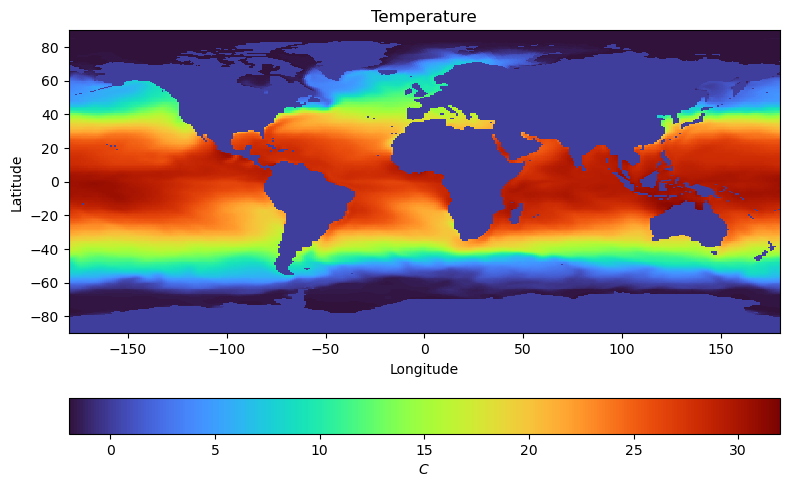

In [9]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))

# make a subplot for the eastward velocity at the surface
# plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,THETA[0, 0, :, :], vmin = -2, vmax=32, cmap='turbo')
plt.colorbar(C, orientation='horizontal',
             label='$C$' ) 
plt.title('Temperature')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.tight_layout()
plt.show()


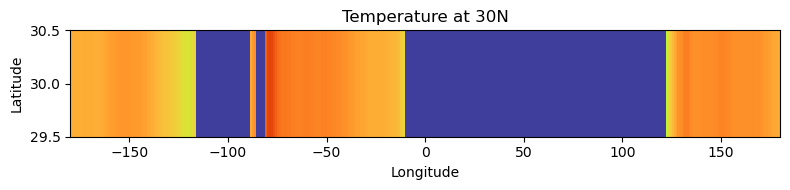

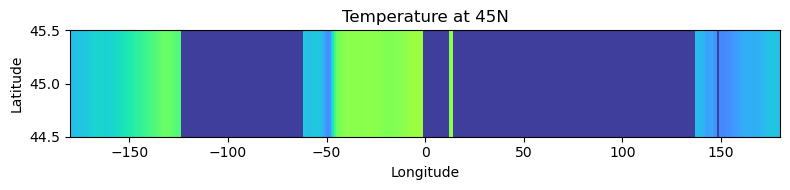

In [10]:
fig = plt.figure(figsize=(8,2))

C = plt.pcolormesh(lon,lat,THETA[0, 0, :, :], vmin = -2, vmax=32, cmap='turbo')
plt.title('Temperature at 30N')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.ylim(29.5, 30.5)

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(8,2))

C = plt.pcolormesh(lon,lat,THETA[0, 0, :, :], vmin = -2, vmax=32, cmap='turbo')
plt.title('Temperature at 45N')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.ylim(44.5, 45.5)

plt.tight_layout()
plt.show()

### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

### Answers:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
    - at 30N, the temperature is cooler on the west coast than the east coast. 
    - at 45N, the temperature is warmer on the west coast than the east coast. 

2. How might ocean currents contribute to this temperature regime?
    - The North Pacific Ocean gyre to the west of the US brings cold water down along the coast, making cool water, while the North Atlantic Ocean gyre is pulling warm water up from the equator, along the east coast, making the east coast water significantly warmer than the west coast. 
    - At 45N, the water looks to be a little colder on the east coast. this could be from a) the water has been cooling down as it travels northward along the current and b) mixing from the cold Greenland current waters that meet near this 45N line? 

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [11]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_WVELSTAR = xr.open_dataset('WVELSTAR_2015_12.nc')
ds_WVELSTAR

<xarray.Dataset>
Dimensions:    (i: 720, j: 360, k_l: 50, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 0 1 2 3 4 5 6 7 8 ... 712 713 714 715 716 717 718 719
  * j          (j) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 2015-12-16T12:00:00
    latitude   (j) float64 ...
    longitude  (i) float64 ...
    timestep   (time) int64 ...
    Zl         (k_l) float32 ...
    time_bnds  (time, nv) datetime64[ns] ...
Dimensions without coordinates: nv
Data variables:
    WVELSTAR   (time, k_l, j, i) float64 ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      0.0
    date_created:                 Tue Aug 27 18:20:19 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

In [12]:
# store the WVELSTAR grid into a into numpy array
WVELSTAR = ds_WVELSTAR['WVELSTAR'].values

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [13]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?
Z = ds_WVELSTAR['Zl'].values

print(NVEL.shape)
print(WVELSTAR.shape)
print(lon.shape)

(1, 50, 360, 720)
(1, 50, 360, 720)
(720,)


Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40N i.e. index 259 along the latitude axis.

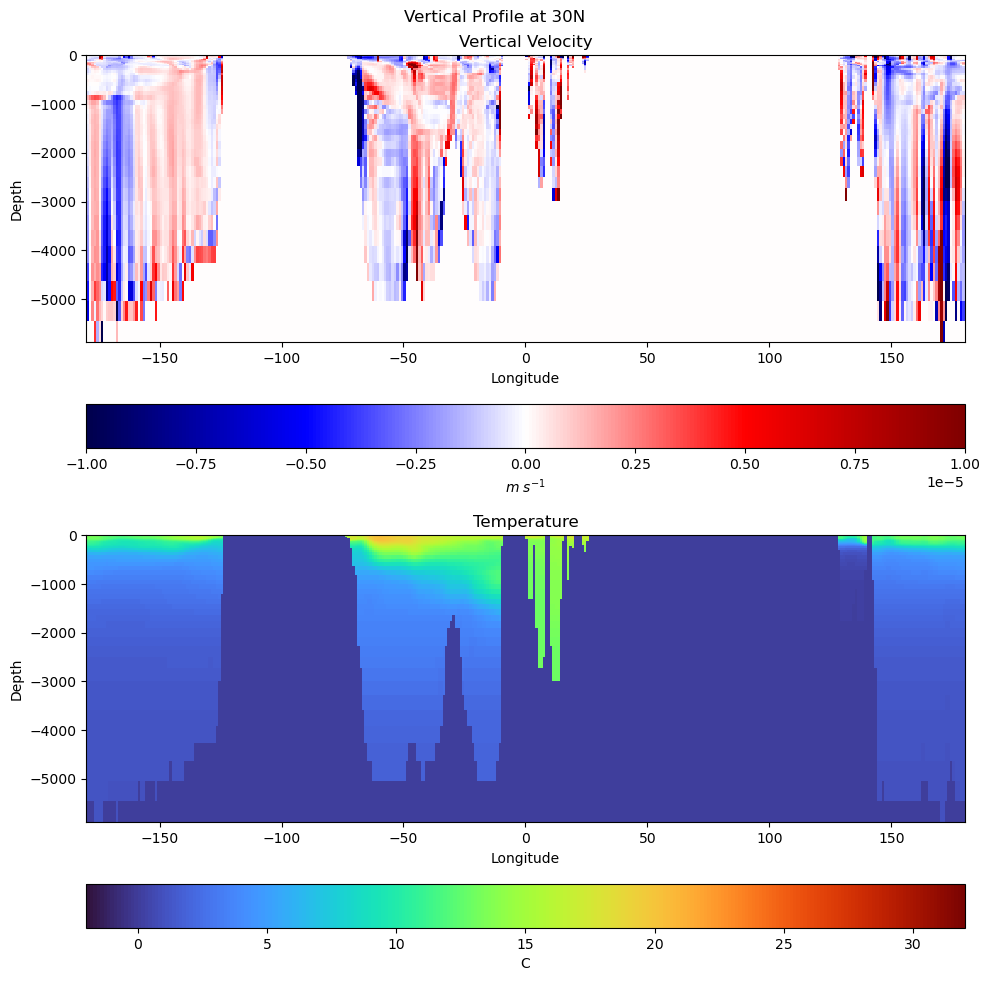

In [14]:
# make a figure
fig = plt.figure(figsize=(10,10))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(2,1,1)

C = plt.pcolormesh(lon,Z,WVELSTAR[0, :, 259, :], vmin = -0.00001, vmax=0.00001, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$m$ $s^{-1}$' ) 
plt.title('Vertical Velocity')
plt.ylabel('Depth')
plt.xlabel('Longitude')


# make a subplot of the vertical profile of temperature
plt.subplot(2,1,2)
C = plt.pcolormesh(lon,Z,THETA[0, :, 259, :], vmin = -2, vmax=32, cmap='turbo')
plt.colorbar(C, orientation='horizontal',
             label='C' )
plt.title('Temperature')
plt.ylabel('Depth')
plt.xlabel('Longitude')

plt.suptitle('Vertical Profile at 30N')
plt.tight_layout()
plt.show()




### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

### Answers:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
    - In general, this vertical velocity seems very weak; however, the velocity on the west coast is roughly moving towards the surface, except very near the shore where it moves towards the sea floor. The east coast shows the water very near the coast moving down towards the floor.

2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
    - The speed of the vertical velocity is orders of magnitude weaker than the horizontal velocity. The wind, especially at the surface, has a larger impact on moving the water around (dragging it horizontally). 
    
    - The horizontal velocity of the water is influenced by wind stress, density (pressure?), coriolis effect. 
    - I think the vertical velocity (up- and downwelling) is more influenced by ekman spiral (tranport), density (bouyant force?), temperature. 
    The Ekman spiral effect can pull water away from the shore causing upwelling, or if it moves water towards the shore, we could have downwelling.

3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
    - I think that there is an element of upwelling on the west, where deep cold waters are pulled to the surface and carried away in the near-surface currents, lowering temperatures. The data suggests that there is a downwelling (?) on the near-shore east coast waters, pulling warmer surface water down into the verticle column (negative vertical velocity). 
  
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?
    - The Ekman spiral? The near-shore surface waters would flow southwest, away from the coast, causing an upwelling near the shore bringing deep, cold water to the surface. Increased upwelling would cause an increased positive vertical velocity. Maybe this is the upwelling seen in question 3. 

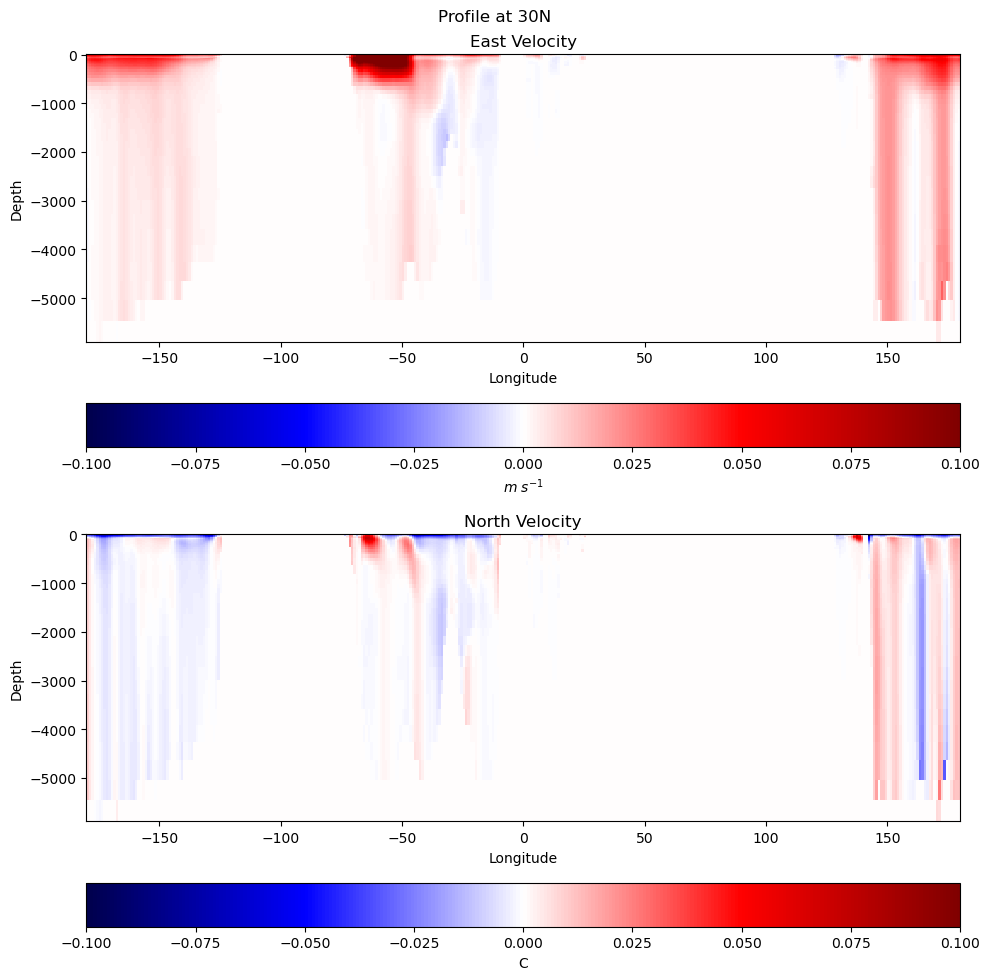

In [15]:
# make a figure
fig = plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
C = plt.pcolormesh(lon,Z,EVEL[0, :, 259, :], vmin = -0.1, vmax=0.1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$m$ $s^{-1}$' ) 
plt.title('East Velocity')
plt.ylabel('Depth')
plt.xlabel('Longitude')


plt.subplot(2,1,2)
C = plt.pcolormesh(lon,Z,NVEL[0, :, 259, :], vmin = -0.1, vmax=0.1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='C' )
plt.title('North Velocity')
plt.ylabel('Depth')
plt.xlabel('Longitude')

plt.suptitle('Profile at 30N')
plt.tight_layout()
plt.show()




### Canvas question
Question: Your family is planning a summer vacation and would like to visit one of northern coastlines of the U.S. They are thinking about going to Newport, Oregon (west coast) or Portland, Maine (east coast), which are roughly at the same latitude of 440N. They would like to go swimming and want to travel to a place with warm water. Where you would advise they travel? Based on the ocean currents, why would this location have warmer water?

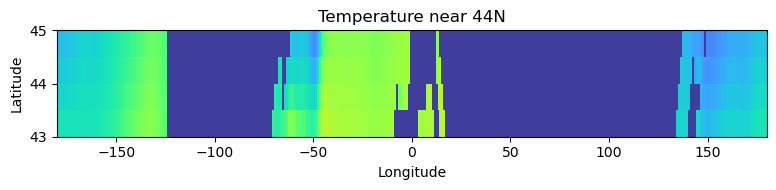

In [16]:
fig = plt.figure(figsize=(8,2))

C = plt.pcolormesh(lon,lat,THETA[0, 0, :, :], vmin = -2, vmax=32, cmap='turbo')
plt.title('Temperature near 44N')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.ylim(43, 45)

plt.tight_layout()
plt.show()